<a href="https://colab.research.google.com/github/vaibhavrouduri/Thesis-Work/blob/main/Vaibhav_Code/Banaji_Lab_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Packages to be downloaded

In [ ]:
import numpy as np
import random
import time
from itertools import filterfalse
from scipy import spatial
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import gensim
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import word2vec
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity
from gensim.scripts.glove2word2vec import glove2word2vec

Imported pretrained glove vectors trained on 800B words.
Took help from https://colab.research.google.com/github/keras-team/keras-io/blob/master/examples/nlp/ipynb/pretrained_word_embeddings.ipynb#scrollTo=EVOo9FVY2L8P and https://medium.com/analytics-vidhya/basics-of-using-pre-trained-glove-vectors-in-python-d38905f356db


---



#Downloading the word vectors and creating a dictionary that maps words to their vectors

In [ ]:
!wget http://nlp.stanford.edu/data/glove.840B.300d.zip # Retrieves content from the given URL
!unzip -q glove.840B.300d.zip # Unzips the file and returns the .txt file which can be used for analysis

--2021-11-19 20:19:53--  http://nlp.stanford.edu/data/glove.840B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.840B.300d.zip [following]
--2021-11-19 20:19:53--  https://nlp.stanford.edu/data/glove.840B.300d.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip [following]
--2021-11-19 20:19:53--  http://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2176768927 (2.0G) [application/zip

In [ ]:
embeddings_glove = {} # Empty dictionary in which the words in the vocabulary and the corresponding vector will be added
with open("glove.840B.300d.txt") as f:
    for line in f: # Each line in the file contains the token followed by a the vector representation of that token trained in glove in 300 dimensions separated by a space. Each dimension of the vector is separated by a space as well
        word, coefs = line.split(maxsplit=1) # Splits the line as described above at the first space, hence the token gets separated from the vector. The token is stored in 'word' and the vector is stored in 'coefs'
        coefs = np.fromstring(coefs, "f", sep=" ") # Returns the vector representation in the form of an array which can now be used for analysis (cosine similarity, etc)
        embeddings_glove[word] = coefs # Add the token and its corresponding vector into the dictionary as key and value pair. Now we can call the vector of any token in the vocabulary via the dictionary

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  """


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip # Retrieves content from the given URL
!unzip -q glove.6B.zip # Unzips the file and returns the .txt file which can be used for analysis. In this case, returns 4 files, having 50, 100, 200, and 300 dimensional vectors. We are choosing to use the 300 dimensional vectors

--2021-11-19 20:20:36--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-11-19 20:20:36--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-11-19 20:20:36--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
embeddings_glove_wiki_gw = {} # Empty dictionary in which the words in the vocabulary and the corresponding vector will be added
with open("glove.6B.300d.txt") as f:
    for line in f: # Each line in the file contains the token followed by a the vector representation of that token trained in glove in 300 dimensions separated by a space. Each dimension of the vector is separated by a space as well
        word, coefs = line.split(maxsplit=1) # Splits the line as described above at the first space, hence the token gets separated from the vector. The token is stored in 'word' and the vector is stored in 'coefs'
        coefs = np.fromstring(coefs, "f", sep=" ") # Returns the vector representation in the form of an array which can now be used for analysis (cosine similarity, etc)
        embeddings_glove_wiki_gw[word] = coefs # Add the token and its corresponding vector into the dictionary as key and value pair. Now we can call the vector of any token in the vocabulary via the dictionary

# Fastext

## Common Crawl

In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/crawl-300d-2M.vec.zip # Retrieves content from the given URL
!unzip -q crawl-300d-2M.vec.zip # Unzips the file and returns the .vec file which can be used for analysis

--2021-11-19 20:33:00--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/crawl-300d-2M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.74.142, 172.67.9.4, 104.22.75.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.74.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1523785255 (1.4G) [application/zip]
Saving to: ‘crawl-300d-2M.vec.zip’

crawl-300d-2M.vec.z 100%[===================>]   1.42G  19.5MB/s    in 74s     

2021-11-19 20:34:15 (19.5 MB/s) - ‘crawl-300d-2M.vec.zip’ saved [1523785255/1523785255]



In [ ]:
embeddings_fastext_cc = {}
with open("crawl-300d-2M.vec") as f:
    for line in f: # Each line in the file contains the token followed by a the vector representation of that token trained in glove in 300 dimensions separated by a space. Each dimension of the vector is separated by a space as well
        word, coefs = line.split(maxsplit=1) # Splits the line as described above at the first space, hence the token gets separated from the vector. The token is stored in 'word' and the vector is stored in 'coefs'
        coefs = np.fromstring(coefs, "f", sep=" ") # Returns the vector representation in the form of an array which can now be used for analysis (cosine similarity, etc)
        embeddings_fastext_cc[word] = coefs # Add the token and its corresponding vector into the dictionary as key and value pair. Now we can call the vector of any token in the vocabulary via the dictionary

## Wikipedia


In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip # Retrieves content from the given URL
!unzip -q wiki-news-300d-1M.vec.zip # Unzips the file and returns the .vec file which can be used for analysis

--2021-11-01 15:45:39--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 172.67.9.4, 104.22.75.142, 104.22.74.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|172.67.9.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 681808098 (650M) [application/zip]
Saving to: ‘wiki-news-300d-1M.vec.zip’

wiki-news-300d-1M.v 100%[===================>] 650.22M  19.9MB/s    in 34s     

2021-11-01 15:46:13 (19.3 MB/s) - ‘wiki-news-300d-1M.vec.zip’ saved [681808098/681808098]



In [ ]:
embeddings_fastext_wiki = {}
with open("wiki-news-300d-1M.vec") as f:
    for line in f: # Each line in the file contains the token followed by a the vector representation of that token trained in glove in 300 dimensions separated by a space. Each dimension of the vector is separated by a space as well
        word, coefs = line.split(maxsplit=1) # Splits the line as described above at the first space, hence the token gets separated from the vector. The token is stored in 'word' and the vector is stored in 'coefs'
        coefs = np.fromstring(coefs, "f", sep=" ") # Returns the vector representation in the form of an array which can now be used for analysis (cosine similarity, etc)
        embeddings_fastext_cc[word] = coefs # Add the token and its corresponding vector into the dictionary as key and value pair. Now we can call the vector of any token in the vocabulary via the dictionary

# word2vec

In [ ]:
!wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2021-11-03 15:11:48--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.36.6
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.36.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘/root/input/GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  44.6MB/s    in 37s     

2021-11-03 15:12:26 (42.2 MB/s) - ‘/root/input/GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [ ]:
EMBEDDING_FILE = '/root/input/GoogleNews-vectors-negative300.bin.gz'
embeddings_word2vec = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

# Using the merriam websters thesaurus API to check definitions and synonyms of different words

In [ ]:
pip install mwthesaurus # pip is the package installer for python. Here we are using it to download the Merriam-Webster Dictionary package 

     |████████████████████████████████| 55 kB 1.8 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
     |████████████████████████████████| 1.2 MB 19.2 MB/s 
     |████████████████████████████████| 65 kB 2.5 MB/s 
     |████████████████████████████████| 53 kB 1.6 MB/s 


In [ ]:
# In order to use the API, you are required to register on the website https://dictionaryapi.com/ after you will be provided with a key.
from mwthesaurus import MWClient 
client = MWClient(key = "c718d29d-2915-4216-963b-dc24718dd162")
client.get("idyll")

[Word(word='idyll', wordtype='noun', shortdef=['a time or instance of carefree fun'], synonyms=['binge', 'fling', 'frisk', 'frolic', 'gambol', 'lark', 'ploy', 'revel', 'rollick', 'romp', 'spree'], antonyms=[], stems=['idyll', 'idyl', 'idylls', 'idyls'])]

#WEAT

In [ ]:
# # Valenced 1
# A = ["Love", "Cheer", "Friend", "Pleasure", "Paradise", "Splendid"]
# B = ["Abuse", "Grief", "Poison", "Sadness", "Pain", "Bomb"]

In [ ]:
# # Valenced 2
# A = ["Adore", "Cheerful", "Euphoric", "Friendship", "Joyful", "Smiling"]
# B = ["Aggravate", "Despise", "Failure", "Horrendous", "Nasty", "Repulsive"]

In [ ]:
# # Valenced 3
# A = ["Affectionate", "Cherish", "Excellent", "Glad", "Joyous", "Spectacular"]
# B = ["Angry", "Detest", "Ghastly", "Horrible", "Negative", "Ugly"]

In [ ]:
# # Valenced 4
# A = ["Appealing", "Delight", "Excitement", "Glee", "Laughing", "Splendid"]
# B = ["Animosity", "Dirty", "Gross", "Evil", "Neglected", "Rotten"]

In [ ]:
# Valenced 5
A = ["Attractive", "Delightful", "Fabulous", "Glorious", "Likeable", "Pleasing"]
B = ["Annoy", "Disaster", "Grotesque", "Horrific", "Noxious", "Scorn"]

In [ ]:
# # Valenced 6
# A = ["Beautiful", "Fantastic", "Happy", "Lovely", "Pleasure", "Terrific"]
# B = ["Awful", "Disgust", "Hate", "Humilate", "Selfish", "Tragic"]

In [ ]:
# # Valenced 7
# A = ["Celebrate", "Enjoy", "Favorable", "Gorgeous", "Magnificent", "Triumph"]
# B = ["Bothersome", "Hatred", "Hurtful", "Putrid", "Sickening", "Yucky"]

In [ ]:
# # Combined stilumlus sets
# A = ["Love", "Cheer", "Friend", "Pleasure", "Paradise", "Splendid", "Adore", "Cheerful", "Euphoric", "Friendship", "Joyful", "Smiling", "Affectionate", "Cherish", "Excellent", "Glad", "Joyous", "Spectacular", "Appealing", "Delight", "Excitement", "Glee", "Laughing", "Splendid", "Attractive", "Delightful", "Fabulous", "Glorious", "Likeable", "Pleasing", "Beautiful", "Fantastic", "Happy", "Lovely", "Pleasure", "Terrific", "Celebrate", "Enjoy", "Favorable", "Gorgeous", "Magnificent", "Triumph"]
# B = ["Abuse", "Grief", "Poison", "Sadness", "Pain", "Bomb", "Aggravate", "Despise", "Failure", "Horrendous", "Nasty", "Repulsive", "Angry", "Detest", "Ghastly", "Horrible", "Negative", "Ugly", "Animosity", "Dirty", "Gross", "Evil", "Neglected", "Rotten", "Annoy", "Disaster", "Grotesque", "Horrific", "Noxious", "Scorn", "Awful", "Disgust", "Hate", "Humiliate", "Selfish", "Tragic", "Bothersome", "Hatred", "Hurtful", "Putrid", "Sickening", "Yucky"]

In [ ]:
# # European American - African American/Pleasant - Unpleasant
# X = ["Adam", "Harry", "Josh", "Roger", "Alan", "Frank", "Justin",
# "Ryan", "Andrew", "Jack", "Matthew", "Stephen", "Brad", "Greg", "Paul", "Jonathan", "Peter", "Amanda", "Courtney", "Heather", "Melanie", "Katie", "Betsy", "Kristin", "Nancy", "Stephanie",
# "Ellen", "Lauren", "Colleen", "Emily", "Megan", "Rachel"]
# Y = ["Alonzo", "Jamel", "Theo", "Alphonse", "Jerome",
# "Leroy", "Torrance", "Darnell", "Lamar", "Lionel", "Tyree", "Deion", "Lamont", "Malik",
# "Terrence", "Tyrone", "Lavon", "Marcellus", "Wardell", "Nichelle",
# "Shereen", "Ebony", "Latisha", "Shaniqua", "Jasmine",
# "Tanisha", "Tia", "Lakisha", "Latoya", "Yolanda", "Malika", "Yvette"]
# # # IAT Attribute list
# # A = ["Love", "Cheer", "Friend", "Pleasure", "Paradise", "Splendid"]
# # B = ["Abuse", "Grief", "Poison", "Sadness", "Pain", "Bomb"]
# # Aylin's Attribute list
# A = ["caress", "freedom", "health", "love", "peace", "cheer", "friend", "heaven", "loyal", "pleasure", "diamond", "gentle", "honest", "lucky", "rainbow", "diploma", "gift", "honor", "miracle", "sunrise", "family",
#     "happy", "laughter", "paradise", "vacation"] 
# B = ["abuse", "crash", "filth", "murder", "sickness", "accident", "death", "grief", "poison", "stink", "assault", "disaster", "hatred", "pollute", "tragedy", "divorce", "jail", "poverty", "ugly", "cancer", "kill", "rotten",
#     "vomit", "agony", "prison"]


In [ ]:
# Asian - White

X = ["Chang", "Hwang", "Wong", "Chen", "Nguyen", "Fujimoto", "Lee"]
Y = ["Smith", "Jones", "Adams", "Harris", "Miller", "Perry", "Ward"]
# X = ["Chang", "Hwang", "Wong", "Chen", "Nguyen", "Fujimoto", "Lee", "Cheng", "Wei", "Liang", "Jang", "Qian"]
# Y = ["Smith", "Jones", "Adams", "Harris", "Miller", "Perry", "Ward", "Adam", "Harry", "Josh", "Roger", "Alan"]

# # IAT Attributes
# A = ["Affectionate", "Cherish", "Excellent", "Glad", "Joyous", "Spectacular"]
# B = ["Angry", "Detest", "Ghastly", "Horrible", "Negative", "Ugly"] 

# Kirsten Project Attributes
A = ["Triumph", "Friendship", "Magnificent", "Glad", "Friend", "Enjoy", "Fantastic"]
B = ["Hatred", "Dirty", "Despise", "Disgust", "Evil", "Horrible", "Yucky"]

In [ ]:
# # Young People - Old People
# # Correct and significant
# X = ["Tiffany", "Michelle", "Cindy", "Kristy", "Brad", "Eric", "Joey", "Billy"]
# Y = ["Ethel", "Bernice", "Gertrude", "Agnes", "Cecil", "Wilbert", "Mortimer", "Edgar"]
# # IAT Attributes
# A = ["Affectionate", "Cherish", "Excellent", "Glad", "Joyous", "Spectacular"]
# B = ["Angry", "Detest", "Ghastly", "Horrible", "Negative", "Ugly"]
# # Aylin's Attributes
# # A = ["joy", "love", "peace", "wonderful", "pleasure", "friend", "laughter", "happy"]
# # B = ["agony", "terrible", "horrible", "nasty", "evil", "war", "awful", "failure"]

In [ ]:
# Difficult - Simple
X = ["Complicated", "Challenging", "Puzzling", "Baffling"]
Y = ["Easy", "Elementary", "Straightforward", "Effortless"]
A = ["Appealing", "Delight", "Excitement", "Glee", "Laughing", "Splendid"]
B = ["Animosity", "Dirty", "Gross", "Evil", "Neglected", "Rotten"]


In [ ]:
# # Drinking - Abstaining
# X = ["Alcohol", "Drunk", "Intoxicated", "Inebriated"]
# Y = ["Abstain", "Sober", "Refrain", "Refraining", "Sobriety"]
# A = ["Celebrate", "Enjoy", "Favorable", "Gorgeous", "Magnificent", "Triumph"]
# B = ["Bothersome", "Hatred", "Hurtful", "Putrid", "Sickening", "Yucky"]
# # Combined stilumlus sets
# A = ["Love", "Cheer", "Friend", "Pleasure", "Paradise", "Splendid", "Adore", "Cheerful", "Euphoric", "Friendship", "Joyful", "Smiling", "Affectionate", "Cherish", "Excellent", "Glad", "Joyous", "Spectacular", "Appealing", "Delight", "Excitement", "Glee", "Laughing", "Splendid", "Attractive", "Delightful", "Fabulous", "Glorious", "Likeable", "Pleasing", "Beautiful", "Fantastic", "Happy", "Lovely", "Pleasure", "Terrific", "Celebrate", "Enjoy", "Favorable", "Gorgeous", "Magnificent", "Triumph"]
# B = ["Abuse", "Grief", "Poison", "Sadness", "Pain", "Bomb", "Aggravate", "Despise", "Failure", "Horrendous", "Nasty", "Repulsive", "Angry", "Detest", "Ghastly", "Horrible", "Negative", "Ugly", "Animosity", "Dirty", "Gross", "Evil", "Neglected", "Rotten", "Annoy", "Disaster", "Grotesque", "Horrific", "Noxious", "Scorn", "Awful", "Disgust", "Hate", "Humiliate", "Selfish", "Tragic", "Bothersome", "Hatred", "Hurtful", "Putrid", "Sickening", "Yucky"]

In [ ]:
# # Skeptical - Trusting

# # # IAT Stimuli
# # X = ["Questioning", "Hesitant", "Wary", "Doubtful"]
# # Y = ["Convinced", "Confident", "Accepting", "Believing"]

# # Modified
# X = ["Skeptical", "Questioning", "Hesitant", "Wary", "Doubtful"]
# Y = ["Trusting", "Convinced", "Confident", "Accepting", "Believing"]

# A = ["Appealing", "Delight", "Excitement", "Glee", "Laughing", "Splendid"]
# B = ["Animosity", "Dirty", "Gross", "Evil", "Neglected", "Rotten"]

In [ ]:
# # Avoiding - Approaching

# # # IAT Stimuli
# # X = ["Back", "Withdraw", "Recoil", "Retreat", "Away"]
# # Y = ["Toward", "Closer", "Advance", "Forward", "Near"]

# # Modified
# X = ["Avoiding", "Back", "Withdraw", "Recoil", "Retreat", "Away"] 
# Y = ["Approaching", "Toward", "Closer", "Advance", "Forward", "Near"]

# A = ["Adore", "Cheerful", "Euphoric", "Friendship", "Joyful", "Smiling"]
# B = ["Aggravate", "Despise", "Failure", "Horrendous", "Nasty", "Repulsive"]

In [ ]:
# # Poor People - Rich People
# X = ["Poor", "Impoverished", "Broke", "Bankrupt"]
# Y = ["Wealthy", "Affluent", "Prosperous", "well-off"]
# A = ["Appealing", "Delight", "Excitement", "Glee", "Laughing", "Splendid"]
# B = ["Animosity", "Dirty", "Gross", "Evil", "Neglected", "Rotten"]

In [ ]:
# # Punishment - Forgiveness

# # IAT Attributes
# X = ["Penalty", "Retribution", "Discipline", "Punitive", "Sanction"]
# Y = ["Pardon", "Reprieve", "Amnesty", "Lenient", "Mercy"]

# # # Modified Attributes
# # X = ["Punishment", "Penalty", "Retribution", "Discipline", "Punitive", "Sanction"]
# # Y = ["Forgiveness", "Pardon", "Reprieve", "Amnesty", "Lenient", "Mercy"]

# A = ["Celebrate", "Enjoy", "Favorable", "Gorgeous", "Magnificent", "Triumph"]
# B = ["Bothersome", "Hatred", "Hurtful", "Putrid", "Sickening", "Yucky"]

In [ ]:
# # Money - Love
# X = ["Affluence", "Wealth", "Investments", "Cash"]
# Y = ["Affection", "Heart", "Relationship", "Romance"]
# A = ["Adore", "Cheerful", "Euphoric", "Friendship", "Joyful", "Smiling"]
# B = ["Aggravate", "Despise", "Failure", "Horrendous", "Nasty", "Repulsive"]

In [ ]:
def cos(v1, v2): 
  """Returns the cosine similarity of 2 vectors of same dimesionality.

    Arguments:
    v1 -- Vector 1
    v2 -- Vector 2
    """

  num = np.dot(v1, v2)
  denom = np.linalg.norm(v1) * np.linalg.norm(v2)
  return num/denom

In [ ]:
def weat_swAB(w, A, B, embedding_type):  
  """Returns the association of a single word with the chosen attribute (eg. good/bad).

    Arguments:
    w -- The string(word) whose association with the chosen attribute you want to find
    A -- List of Attribute words representing 1 end of the spectrum (eg. for the attribute Good/Bad, the list of words representing 'Good')
    B -- List of Attribute words representing the other end of the spectrum (eg. for the attribute Good/Bad, the list of words representing 'Bad')
    embedding_type -- The dictionary for the corpus algorithm pair being used in the current analysis (eg. for glove with common crawl, use embeddings_glove)
    """
  A_list = []
  B_list = []

  for v in A:
    A_list.append(cos(embedding_type[w], embedding_type[v]))
  for v in B:
    B_list.append(cos(embedding_type[w], embedding_type[v]))

  A_array = np.array(A_list)
  B_array = np.array(B_list)

  return np.mean(A_array) - np.mean(B_array)

In [ ]:
def weat_ES(X, Y, A, B, embedding_type):
  """Returns the effect size of a pair of categories (eg Simple vs Difficult) with the chosen attribute (eg. good/bad).

    Arguments:
    X -- List of Category words representing 1 of the categories (eg. for Simple/Difficult, the list of words representing 'Simple')
    Y -- List of Category words representing the other category (eg. for Simple/Difficult, the list of words representing 'Difficult')
    A -- List of Attribute words representing 1 end of the spectrum (eg. for the attribute Good/Bad, the list of words representing 'Good')
    B -- List of Attribute words representing the other end of the spectrum (eg. for the attribute Good/Bad, the list of words representing 'Bad')
    embedding_type -- The dictionary for the corpus algorithm pair being used in the current analysis (eg. for glove with common crawl, use embeddings_glove)
    """
  x_list = []
  y_list = []

  for x in X:
    x_list.append(weat_swAB(x, A, B, embedding_type))
  for y in Y:
    y_list.append(weat_swAB(y, A, B, embedding_type))

  x_array = np.array(x_list)
  y_array = np.array(y_list)

  return (np.mean(x_array) - np.mean(y_array))/(np.std(np.concatenate((x_array, y_array)), ddof = 1))

In [ ]:
def test_statistic(X, Y, A, B, embedding_type):
   """Returns the test statistic given the 2 sets of category stimuli and attribute stimuli.

    Arguments:
    X -- List of Category words representing 1 of the categories (eg. for Simple/Difficult, the list of words representing 'Simple')
    Y -- List of Category words representing the other category (eg. for Simple/Difficult, the list of words representing 'Difficult')
    A -- List of Attribute words representing 1 end of the spectrum (eg. for the attribute Good/Bad, the list of words representing 'Good')
    B -- List of Attribute words representing the other end of the spectrum (eg. for the attribute Good/Bad, the list of words representing 'Bad')
    embedding_type -- The dictionary for the corpus algorithm pair being used in the current analysis (eg. for glove with common crawl, use embeddings_glove)
    """
  x_list = []
  y_list = []

  for x in X:
    x_list.append(weat_swAB(x, A, B, embedding_type))
  for y in Y:
    y_list.append(weat_swAB(y, A, B, embedding_type))

  x_array = np.array(x_list)
  y_array = np.array(y_list)

  return np.sum(x_array) - np.sum(y_array)

In [ ]:
def random_permutation(targets, r):
  """Returns a random permutation of a fixed of a chosed list.

    Arguments:
    targets -- The list whose permutation is to be generated
    r -- Size of the permutation
    """
  return random.sample(targets, r)

Took help from https://github.com/jsedoc/ConceptorDebias/blob/master/WEAT/WEAT.ipynb

In [ ]:
def p_value_weat(X, Y, A, B, embedding_type, iterations):
  """Returns the p-value given a pair of categories (eg Simple vs Difficult) and the chosen attribute (eg. good/bad).

    Arguments:
    X -- List of Category words representing 1 of the categories (eg. for Simple/Difficult, the list of words representing 'Simple')
    Y -- List of Category words representing the other category (eg. for Simple/Difficult, the list of words representing 'Difficult')
    A -- List of Attribute words representing 1 end of the spectrum (eg. for the attribute Good/Bad, the list of words representing 'Good')
    B -- List of Attribute words representing the other end of the spectrum (eg. for the attribute Good/Bad, the list of words representing 'Bad')
    embedding_type -- The dictionary for the corpus algorithm pair being used in the current analysis (eg. for glove with common crawl, use embeddings_glove)
    iterations -- Number of permutations you want to generate (The more you generate, the more accurate the result is)
    """
  X_Y = X + Y
  size_of_permutation = len(X)
  permutations = []
  test_statistics_permutations = []
  condition_satisfied = []
  count = 0

  while iterations != 0:
    permutations.append(random_permutation(X_Y, size_of_permutation))
    iterations = iterations - 1

  for Xi in permutations:
    count = count + 1
    Yi = filterfalse(lambda w:w in Xi, X_Y)
    test_statistics_permutations.append(test_statistic(Xi, Yi, A, B, embedding_type))

  overall_test_statistic = test_statistic(X, Y, A, B, embedding_type)

  condition_satisfied = [p > overall_test_statistic for p in test_statistics_permutations]

  condition_satisfied_array = np.array(condition_satisfied)

  return condition_satisfied_array.sum()/condition_satisfied_array.size

In [ ]:
# Capitalized

# Valenced 1
A = ["Love", "Cheer", "Friend", "Pleasure", "Paradise", "Splendid"]
B = ["Abuse", "Grief", "Poison", "Sadness", "Pain", "Bomb"]

# # Valenced 2
# A = ["Adore", "Cheerful", "Euphoric", "Friendship", "Joyful", "Smiling"]
# B = ["Aggravate", "Despise", "Failure", "Horrendous", "Nasty", "Repulsive"]

# # Valenced 3
# A = ["Affectionate", "Cherish", "Excellent", "Glad", "Joyous", "Spectacular"]
# B = ["Angry", "Detest", "Ghastly", "Horrible", "Negative", "Ugly"]

# # Valenced 4
# A = ["Appealing", "Delight", "Excitement", "Glee", "Laughing", "Splendid"]
# B = ["Animosity", "Dirty", "Gross", "Evil", "Neglected", "Rotten"]

# # Valenced 5
# A = ["Attractive", "Delightful", "Fabulous", "Glorious", "Likeable", "Pleasing"]
# B = ["Annoy", "Disaster", "Grotesque", "Horrific", "Noxious", "Scorn"]

# # Valenced 6
# A = ["Beautiful", "Fantastic", "Happy", "Lovely", "Pleasure", "Terrific"]
# B = ["Awful", "Disgust", "Hate", "Humiliate", "Selfish", "Tragic"]

# # Valenced 7
# A = ["Celebrate", "Enjoy", "Favorable", "Gorgeous", "Magnificent", "Triumph"]
# B = ["Bothersome", "Hatred", "Hurtful", "Putrid", "Sickening", "Yucky"]

# # Combined stilumlus sets
# A = ["Love", "Cheer", "Friend", "Pleasure", "Paradise", "Splendid", "Adore", "Cheerful", "Euphoric", "Friendship", "Joyful", "Smiling", "Affectionate", "Cherish", "Excellent", "Glad", "Joyous", "Spectacular", "Appealing", "Delight", "Excitement", "Glee", "Laughing", "Splendid", "Attractive", "Delightful", "Fabulous", "Glorious", "Likeable", "Pleasing", "Beautiful", "Fantastic", "Happy", "Lovely", "Pleasure", "Terrific", "Celebrate", "Enjoy", "Favorable", "Gorgeous", "Magnificent", "Triumph"]
# B = ["Abuse", "Grief", "Poison", "Sadness", "Pain", "Bomb", "Aggravate", "Despise", "Failure", "Horrendous", "Nasty", "Repulsive", "Angry", "Detest", "Ghastly", "Horrible", "Negative", "Ugly", "Animosity", "Dirty", "Gross", "Evil", "Neglected", "Rotten", "Annoy", "Disaster", "Grotesque", "Horrific", "Noxious", "Scorn", "Awful", "Disgust", "Hate", "Humiliate", "Selfish", "Tragic", "Bothersome", "Hatred", "Hurtful", "Putrid", "Sickening", "Yucky"]

Y = ["Complicated", "Challenging", "Puzzling", "Baffling"]
X = ["Easy", "Elementary", "Straightforward", "Effortless"]

In [ ]:
print("Glove, Common Crawl -", weat_ES(X, Y, A, B, embeddings_glove))
# print("Fastext, Common Crawl -", weat_ES(X, Y, A, B, embeddings_fastext_cc))
# print("Glove, Wikipedia -", weat_ES(X, Y, A, B, embeddings_glove_wiki_gw))
# print("Fastext, Wikipedia -", weat_ES(X, Y, A, B, embeddings_fastext_wiki))
# print("Word2Vec, GoogleNews -", weat_ES(X, Y, A, B, embeddings_word2vec))

Glove, Common Crawl - 1.5861425


In [ ]:
print("Glove, Common Crawl -", p_value_weat(X, Y, A, B, embeddings_glove, 1000))
# print("Fastext, Common Crawl -", p_value_weat(X, Y, A, B, embeddings_fastext_cc, 1000))
# print("Glove, Wikipedia -", p_value_weat(X, Y, A, B, embeddings_glove_wiki_gw, 1000))
# print("Fastext, Wikipedia -", p_value_weat(X, Y, A, B, embeddings_fastext_wiki, 1000))
# print("Word2Vec, GoogleNews -", p_value_weat(X, Y, A, B, embeddings_word2vec, 1000))

Glove, Common Crawl - 0.0


In [ ]:
# # Small Letters

# # Valenced 1
# A = ["love", "cheer", "friend", "pleasure", "paradise", "splendid"]
# B = ["abuse", "grief", "poison", "sadness", "pain", "bomb"]

# Valenced 2
A = ["adore", "cheerful", "euphoric", "friendship", "joyful", "smiling"]
B = ["aggravate", "despise", "failure", "horrendous", "nasty", "repulsive"]

# # Valenced 3
# A = ["affectionate", "cherish", "excellent", "glad", "joyous", "spectacular"]
# B = ["angry", "detest", "ghastly", "horrible", "negative", "ugly"]

# # Valenced 4
# A = ["appealing", "delight", "excitement", "glee", "laughing", "splendid"]
# B = ["animosity", "dirty", "gross", "evil", "neglected", "rotten"]

# # Valenced 5
# A = ["attractive", "delightful", "fabulous", "glorious", "likeable", "pleasing"]
# B = ["annoy", "disaster", "grotesque", "horrific", "noxious", "scorn"]

# # Valenced 6
# A = ["beautiful", "fantastic", "happy", "lovely", "pleasure", "terrific"]
# B = ["awful", "disgust", "hate", "humiliate", "selfish", "tragic"]

# # Valenced 7
# A = ["celebrate", "enjoy", "favorable", "gorgeous", "magnificent", "triumph"]
# B = ["bothersome", "hatred", "hurtful", "putrid", "sickening", "yucky"]

# # Combined Stimuli Lists
# A = ["love", "cheer", "friend", "pleasure", "paradise", "splendid", "adore", "cheerful", "euphoric", "friendship", "joyful", "smiling", "affectionate", "cherish", "excellent", "glad", "joyous", "spectacular", "appealing", "delight", "excitement", "glee", "laughing", "splendid", "attractive", "delightful", "fabulous", "glorious", "likeable", "pleasing", "beautiful", "fantastic", "happy", "lovely", "pleasure", "terrific", "celebrate", "enjoy", "favorable", "gorgeous", "magnificent", "triumph"]
# B = ["abuse", "grief", "poison", "sadness", "pain", "bomb", "aggravate", "despise", "failure", "horrendous", "nasty", "repulsive", "angry", "detest", "ghastly", "horrible", "negative", "ugly", "animosity", "dirty", "gross", "evil", "neglected", "rotten", "annoy", "disaster", "grotesque", "horrific", "noxious", "scorn", "awful", "disgust", "hate", "humiliate", "selfish", "tragic", "bothersome", "hatred", "hurtful", "putrid", "sickening", "yucky"]

Y = ["complicated", "challenging", "puzzling", "baffling"]
X = ["easy", "elementary", "straightforward", "effortless"]

In [ ]:
# print("Glove, Common Crawl -", weat_ES(X, Y, A, B, embeddings_glove))
# print("Fastext, Common Crawl -", weat_ES(X, Y, A, B, embeddings_fastext_cc))
# print("Glove, Wikipedia -", weat_ES(X, Y, A, B, embeddings_glove_wiki_gw))
# print("Fastext, Wikipedia -", weat_ES(X, Y, A, B, embeddings_fastext_wiki))
print("Word2Vec, GoogleNews -", weat_ES(X, Y, A, B, embeddings_word2vec))

Word2Vec, GoogleNews - 0.8625596


In [ ]:
# print("Glove, Common Crawl -", p_value_weat(X, Y, A, B, embeddings_glove, 1000))
# print("Fastext, Common Crawl -", p_value_weat(X, Y, A, B, embeddings_fastext_cc, 1000))
# print("Glove, Wikipedia -", p_value_weat(X, Y, A, B, embeddings_glove_wiki_gw, 1000))
# print("Fastext, Wikipedia -", p_value_weat(X, Y, A, B, embeddings_fastext_wiki, 1000))
print("Word2Vec, GoogleNews -", p_value_weat(X, Y, A, B, embeddings_word2vec, 1000))

Word2Vec, GoogleNews - 0.0


In [ ]:
# # Capitalized and lowercase tokens

# # Valenced 1
# A = ["Love", "Cheer", "Friend", "Pleasure", "Paradise", "Splendid", "love", "cheer", "friend", "pleasure", "paradise", "splendid"]
# B = ["Abuse", "Grief", "Poison", "Sadness", "Pain", "Bomb", "abuse", "grief", "poison", "sadness", "pain", "bomb"]

# # Valenced 2
# A = ["Adore", "Cheerful", "Euphoric", "Friendship", "Joyful", "Smiling", "adore", "cheerful", "euphoric", "friendship", "joyful", "smiling"]
# B = ["Aggravate", "Despise", "Failure", "Horrendous", "Nasty", "Repulsive", "aggravate", "despise", "failure", "horrendous", "nasty", "repulsive"]

# # Valenced 3
# A = ["Affectionate", "Cherish", "Excellent", "Glad", "Joyous", "Spectacular", "affectionate", "cherish", "excellent", "glad", "joyous", "spectacular"]
# B = ["Angry", "Detest", "Ghastly", "Horrible", "Negative", "Ugly", "angry", "detest", "ghastly", "horrible", "negative", "ugly"]

# # Valenced 4
# A = ["Appealing", "Delight", "Excitement", "Glee", "Laughing", "Splendid", "appealing", "delight", "excitement", "glee", "laughing", "splendid"]
# B = ["Animosity", "Dirty", "Gross", "Evil", "Neglected", "Rotten", "animosity", "dirty", "gross", "evil", "neglected", "rotten"]

# # Valenced 5
# A = ["Attractive", "Delightful", "Fabulous", "Glorious", "Likeable", "Pleasing", "attractive", "delightful", "fabulous", "glorious", "likeable", "pleasing"]
# B = ["Annoy", "Disaster", "Grotesque", "Horrific", "Noxious", "Scorn", "annoy", "disaster", "grotesque", "horrific", "noxious", "scorn"]

# # Valenced 6
# A = ["Beautiful", "Fantastic", "Happy", "Lovely", "Pleasure", "Terrific", "beautiful", "fantastic", "happy", "lovely", "pleasure", "terrific"]
# B = ["Awful", "Disgust", "Hate", "Humiliate", "Selfish", "Tragic", "awful", "disgust", "hate", "humiliate", "selfish", "tragic"]

# # Valenced 7
# A = ["Celebrate", "Enjoy", "Favorable", "Gorgeous", "Magnificent", "Triumph", "celebrate", "enjoy", "favorable", "gorgeous", "magnificent", "triumph"]
# B = ["Bothersome", "Hatred", "Hurtful", "Putrid", "Sickening", "Yucky", "bothersome", "hatred", "hurtful", "putrid", "sickening", "yucky"]

# # Combined stilumlus sets
# A = ["Love", "Cheer", "Friend", "Pleasure", "Paradise", "Splendid", "Adore", "Cheerful", "Euphoric", "Friendship", "Joyful", "Smiling", "Affectionate", "Cherish", "Excellent", "Glad", "Joyous", "Spectacular", "Appealing", "Delight", "Excitement", "Glee", "Laughing", "Splendid", "Attractive", "Delightful", "Fabulous", "Glorious", "Likeable", "Pleasing", "Beautiful", "Fantastic", "Happy", "Lovely", "Pleasure", "Terrific", "Celebrate", "Enjoy", "Favorable", "Gorgeous", "Magnificent", "Triumph", "love", "cheer", "friend", "pleasure", "paradise", "splendid", "adore", "cheerful", "euphoric", "friendship", "joyful", "smiling", "affectionate", "cherish", "excellent", "glad", "joyous", "spectacular", "appealing", "delight", "excitement", "glee", "laughing", "splendid", "attractive", "delightful", "fabulous", "glorious", "likeable", "pleasing", "beautiful", "fantastic", "happy", "lovely", "pleasure", "terrific", "celebrate", "enjoy", "favorable", "gorgeous", "magnificent", "triumph"]
# B = ["Abuse", "Grief", "Poison", "Sadness", "Pain", "Bomb", "Aggravate", "Despise", "Failure", "Horrendous", "Nasty", "Repulsive", "Angry", "Detest", "Ghastly", "Horrible", "Negative", "Ugly", "Animosity", "Dirty", "Gross", "Evil", "Neglected", "Rotten", "Annoy", "Disaster", "Grotesque", "Horrific", "Noxious", "Scorn", "Awful", "Disgust", "Hate", "Humiliate", "Selfish", "Tragic", "Bothersome", "Hatred", "Hurtful", "Putrid", "Sickening", "Yucky", "abuse", "grief", "poison", "sadness", "pain", "bomb", "aggravate", "despise", "failure", "horrendous", "nasty", "repulsive", "angry", "detest", "ghastly", "horrible", "negative", "ugly", "animosity", "dirty", "gross", "evil", "neglected", "rotten", "annoy", "disaster", "grotesque", "horrific", "noxious", "scorn", "awful", "disgust", "hate", "humiliate", "selfish", "tragic", "bothersome", "hatred", "hurtful", "putrid", "sickening", "yucky"]

In [ ]:
# print("Glove, Common Crawl -", weat_ES(X, Y, A, B, embeddings_glove))
# print("Fastext, Common Crawl -", weat_ES(X, Y, A, B, embeddings_fastext_cc))
# print("Glove, Wikipedia -", weat_ES(X, Y, A, B, embeddings_glove_wiki_gw))
# print("Fastext, Wikipedia -", weat_ES(X, Y, A, B, embeddings_fastext_wiki))
print("Word2Vec, GoogleNews -", weat_ES(X, Y, A, B, embeddings_word2vec))

Word2Vec, GoogleNews - 1.6744921


In [ ]:
# print("Glove, Common Crawl -", p_value_weat(X, Y, A, B, embeddings_glove, 1000))
# print("Fastext, Common Crawl -", p_value_weat(X, Y, A, B, embeddings_fastext_cc, 1000))
# print("Glove, Wikipedia -", p_value_weat(X, Y, A, B, embeddings_glove_wiki_gw, 1000))
# print("Fastext, Wikipedia -", p_value_weat(X, Y, A, B, embeddings_fastext_wiki, 1000))
print("Word2Vec, GoogleNews -", p_value_weat(X, Y, A, B, embeddings_word2vec, 1000))

Word2Vec, GoogleNews - 0.0


#WEFAT

In [ ]:
# # Artists - Musicians
# X = ["Monet", "Picasso", "Michaelangelo"]
# Y = ["Mozart", "Beethoven", "Bach"]
# # Valenced 4
# A = ["Appealing", "Delight", "Excitement", "Glee", "Laughing", "Splendid"]
# B = ["Animosity", "Dirty", "Gross", "Evil", "Neglected", "Rotten"]

In [ ]:
# # Difficult - Simple
# X = ["Complicated", "Challenging", "Puzzling", "Baffling"]
# Y = ["Easy", "Elementary", "Straightforward", "Effortless"]
# A = ["Appealing", "Delight", "Excitement", "Glee", "Laughing", "Splendid"]
# B = ["Animosity", "Dirty", "Gross", "Evil", "Neglected", "Rotten"]


In [ ]:
A = ["Appealing", "Delight", "Excitement", "Glee", "Laughing", "Splendid"]
B = ["Animosity", "Dirty", "Gross", "Evil", "Neglected", "Rotten"]

In [ ]:
# # Combined stilumlus sets
# A = ["Love", "Cheer", "Friend", "Pleasure", "Paradise", "Splendid", "Adore", "Cheerful", "Euphoric", "Friendship", "Joyful", "Smiling", "Affectionate", "Cherish", "Excellent", "Glad", "Joyous", "Spectacular", "Appealing", "Delight", "Excitement", "Glee", "Laughing", "Splendid", "Attractive", "Delightful", "Fabulous", "Glorious", "Likeable", "Pleasing", "Beautiful", "Fantastic", "Happy", "Lovely", "Pleasure", "Terrific", "Celebrate", "Enjoy", "Favorable", "Gorgeous", "Magnificent", "Triumph"]
# B = ["Abuse", "Grief", "Poison", "Sadness", "Pain", "Bomb", "Aggravate", "Despise", "Failure", "Horrendous", "Nasty", "Repulsive", "Angry", "Detest", "Ghastly", "Horrible", "Negative", "Ugly", "Animosity", "Dirty", "Gross", "Evil", "Neglected", "Rotten", "Annoy", "Disaster", "Grotesque", "Horrific", "Noxious", "Scorn", "Awful", "Disgust", "Hate", "Humiliate", "Selfish", "Tragic", "Bothersome", "Hatred", "Hurtful", "Putrid", "Sickening", "Yucky"]

In [ ]:
# # Atheism - Religion
# X = ["Atheist", "Agnostic", "Skeptic"]
# Y = ["Churchgoer", "Religious", "Theist"]
# # Valenced 4
# A = ["Appealing", "Delight", "Excitement", "Glee", "Laughing", "Splendid"]
# B = ["Animosity", "Dirty", "Gross", "Evil", "Neglected", "Rotten"]

# # D value: -1.3912436 P value: 0.955

In [ ]:
# A = ["Affectionate", "Cherish", "Excellent", "Glad", "Joyous", "Spectacular"]
# B = ["Angry", "Detest", "Ghastly", "Horrible", "Negative", "Ugly"]

In [ ]:
# Money - Love
X = ["Affluence", "Wealth", "Investments", "Cash"]
Y = ["Affection", "Heart", "Relationship", "Romance"]
A = ["Adore", "Cheerful", "Euphoric", "Friendship", "Joyful", "Smiling"]
B = ["Aggravate", "Despise", "Failure", "Horrendous", "Nasty", "Repulsive"]

In [ ]:
def wefat_ES(w, A, B):
  A_B = A + B
  cos_A_B = []
  for x in A_B:
    cos_A_B.append(cos(embeddings_index[w], embeddings_index[x]))
  cos_A_B_array = np.array(cos_A_B)

  return weat_swAB(w, A, B)/np.std(cos_A_B_array, ddof = 1)

In [ ]:
def p_value_wefat(w, A, B, iterations):
  A_B = A + B
  size_of_permutation = len(A)
  permutations = []
  test_statistics_permutations = []
  condition_satisfied = []

  while iterations != 0:
    permutations.append(random_permutation(A_B, size_of_permutation))
    iterations = iterations - 1

  for Ai in permutations:
    Bi = filterfalse(lambda w:w in Ai, A_B)
    test_statistics_permutations.append(weat_swAB(w, Ai, Bi))

  overall_test_statistic = weat_swAB(w, A, B)

  condition_satisfied = [p > overall_test_statistic for p in test_statistics_permutations]

  condition_satisfied_array = np.array(condition_satisfied)

  return condition_satisfied_array.sum()/condition_satisfied_array.size

In [ ]:

for i in X:
  print(i, wefat_ES(i, A, B))

Affluence -0.20217516
Wealth 0.40957984
Investments 0.09382773
Cash 0.18805064


In [ ]:
p_value_wefat("Baffling", A, B, 10000)

0.9999

# MAC

In [ ]:
def mac(w, A, B):
  A_B = A + B
  cos_A_B = []
  for x in A_B:
    cos_A_B.append(cos(embeddings_index[w], embeddings_index[x]))
  cos_A_B_array = np.array(cos_A_B)

  return weat_swAB(w, A, B)

In [ ]:
for i in X:
  print(i, mac(i, A, B))

Affluence -0.01314345
Wealth 0.03236956
Investments 0.0063540386
Cash 0.020097207


#Nearest Neighbours

In [ ]:
# Appendiing all the words in vocabulary into a list
words = []
for w in embeddings_index:
  words.append(w)

In [ ]:
def similar_words(word, number):
  """Returns a chosen number of most similar words to a given word in terms of cosine similarity.

    Arguments:
    word -- The token whose most similar words you want to find
    number -- The number of similar words you want to find
    """
  similar_word = []

  words_for_word = words.copy()

  for w in words_for_word:
    if embeddings_index[word].shape != embeddings_index[w].shape:
      words_for_word.remove(w)

  for w in words_for_word: # For some reason unless I run this code snippet twice all the words with different vector shapes aren't getting removed.
    if embeddings_index[word].shape != embeddings_index[w].shape:
      words_for_word.remove(w)

  for w in words_for_word:
    similar_word.append(cos(embeddings_index[word], embeddings_index[w]))
  
  similar_word_copy = similar_word.copy()

  similar_word.sort(reverse = True)

  relevant_indices = []

  for i in range(number + 1):
    relevant_indices.append(similar_word_copy.index(similar_word[i]))

  ans = []

  for i in relevant_indices:
    ans.append(words_for_word[i])
  
  ans.remove(word)

  return ans

In [ ]:
similar_words("Skeptic", 100)

['Skeptical',
 'Skeptics',
 'Atheist',
 'skeptic',
 'Skepticism',
 'Shermer',
 'Sceptic',
 'Atheism',
 'Believer',
 'sceptic',
 'Freethinker',
 'Apologist',
 'Debunking',
 'Environmentalist',
 'Pseudoscience',
 'Theist',
 'Creationist',
 'Agnostic',
 'Curmudgeon',
 'skeptics',
 'Atheists',
 'Cynic',
 'Sceptics',
 'Thinker',
 'theist',
 'Rationalist',
 'Creationism',
 'Alarmist',
 'SciAm',
 'sceptics',
 'Evolutionist',
 'Freethought',
 'CSICOP',
 'Contrarian',
 'Opinionated',
 'Philosophical',
 'Delusion',
 'Athiest',
 'Lomborg',
 'debunker',
 'Cynical',
 'Humanist',
 'Pundit',
 'Infidel',
 'warmist',
 'Scientist',
 'Apologetics',
 'atheist',
 'Dawkins',
 'Philosopher',
 'doubter',
 'Astronomer',
 'Objectivist',
 'Anthropologist',
 'Apostate',
 'Oppressing',
 'AGW',
 'CAGW',
 'JREF',
 'Theism',
 'Secular',
 'Secularism',
 'freethinker',
 'debunking',
 'Deniers',
 'Sceptical',
 'RealClimate',
 'Humanism',
 'freethought',
 'debunkers',
 'Godless',
 'Ethicist',
 'pseudoscience',
 'Atheisti

# Science Religion Project

In [ ]:
similar_words("Judaism", 40)

['Christianity',
 'Jewish',
 'Torah',
 'Zionism',
 'Jews',
 'Catholicism',
 'Orthodoxy',
 'Hinduism',
 'religion',
 'religions',
 'Islam',
 'judaism',
 'Orthodox',
 'Messianic',
 'Jew',
 'Rabbinic',
 'Judeo-Christian',
 'Talmud',
 'Judiasm',
 'Biblical',
 'Protestantism',
 'faiths',
 'Jewry',
 'rabbinic',
 'Judaic',
 'Mormonism',
 'Buddhism',
 'Kabbalah',
 'monotheism',
 'Abrahamic',
 'Paganism',
 'Religion',
 'Religions',
 'Rabbi',
 'Talmudic',
 'Jewishness',
 'Hebrew',
 'theology',
 'Christians',
 'religious']

In [ ]:
Islam_words = ["Islam", "Islamic", "Muslim", "Islamist", "Moslem", "Quran", "Mosque", "Allah"]
Christianity_words = ["Christianity", "Christ", "Bible", "Biblical", "Jesus", "Church", "Gospel", "Christendom"]
Judaism_words = ["Judaism", "Jewish", "Jews", "Torah", "Rabbi", "Jew", "Talmud", "Rabbinic"]
# Christianity_words = ["Catholicism", "Christians", "Protestantism", "Christ", "Biblical", "Jesus", "Catholic", "Protestant", "Christendom"]

In [ ]:
cos(embeddings_index["Islam"], embeddings_index["Mosque"])

0.5125293

In [ ]:
Good_words = ["Good", "Champ", "Excellent", "Superb", "Smile"]
Bad_words = ["Bad", "Terrible", "Bitter", "Yucky", "Nasty"]
Real_words = ["Real", "Genuine", "Authentic", "Accurate"]
Fake_words = ["Fake", "Bogus", "Fraud", "Sham"]
True_words = ["True", "Accurate", "Correct", "Factual"]
False_words = ["False", "Flawed", "Wrong", "Fictional"]

In [ ]:
weat_ES(Christianity_words, Islam_words, Good_words, Bad_words) # Christianity - Good/Islam - Bad 

0.7012066

In [ ]:
p_value_weat(Christianity_words, Islam_words, Good_words, Bad_words, 10000)

0.0879

In [ ]:
weat_ES(Christianity_words, Islam_words, Real_words, Fake_words) # Christianity - Real/Islam - Fake

1.5865585

In [ ]:
p_value_weat(Christianity_words, Islam_words, Real_words, Fake_words, 10000)

0.0001

In [ ]:
weat_ES(Christianity_words, Judaism_words, Good_words, Bad_words) # Christianity - Good/Judaism - Bad 

1.1312969

In [ ]:
p_value_weat(Christianity_words, Judaism_words, Good_words, Bad_words, 10000)

0.0108

In [ ]:
weat_ES(Christianity_words, Judaism_words, Real_words, Fake_words) # Christianity - Real/Judaism - Fake 

1.1870362

In [ ]:
p_value_weat(Christianity_words, Judaism_words, Real_words, Fake_words, 10000)

0.0078

In [ ]:
weat_ES(Judaism_words, Islam_words, Good_words, Bad_words) # Judaism - Good/Islam - Bad 

-0.5965215

In [ ]:
p_value_weat(Judaism_words, Islam_words, Good_words, Bad_words, 10000)

0.8783

In [ ]:
weat_ES(Judaism_words, Islam_words, Real_words, Fake_words) # Judaism - Real/Islam - Fake 

1.1748824

In [ ]:
p_value_weat(Judaism_words, Islam_words, Real_words, Fake_words, 10000)

0.0066

# Plotting Vectors

In [ ]:
def vector_visualization(words_to_visualize):
  tsne = TSNE(n_components = 2, random_state = 1)
  vectors = [embeddings_index[word] for word in words_to_visualize]
  Y = tsne.fit_transform(vectors[:1000])
  plt.scatter(Y[:, 0], Y[:, 1])

  for label, x, y in zip(words_to_visualize, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
  plt.show()


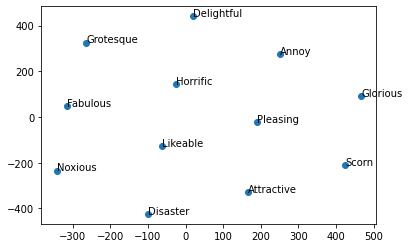

In [ ]:
vector_visualization(A + B)

In [ ]:
# tsne = TSNE(n_components = 2, random_state = 0)
# word_list = ["poor", 'rich']
# vectors = [embeddings_index[word] for word in word_list]
# Y = tsne.fit_transform(vectors[:1000])
# plt.scatter(Y[:, 0], Y[:, 1])

# for label, x, y in zip(word_list, Y[:, 0], Y[:, 1]):
#     plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
# plt.show()